***
# *Final Geoestadística*
***

https://www.github.com/martinfernandoortiz

Martín Fernando Ortiz - Rodrigo Morel



In [1]:
################################################################
#
#   - Importacion de librerias
#   - Asignaciòn de alias
#
####################################################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


***
#  Trabajaremos con el dataset del SMN 

***

In [2]:
# Abrimos el arcivo con los datos:
    
path = "datasets/"    
archivo = "SMN_estaciones_medias_mensuales_1989_2010.xls"
df = pd.read_excel(archivo)


***
Tenemos que corroborar que los tipos de columnas estén bien (algunas se cargan cómo string)

***

In [19]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Estacion,mes,lat,long,Altura_(m),Numero,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm
0,0,0,LA QUIACA,ene,-12.0,-63.333333,3459,87007,12.8,20.1,7.4,65.3,6.9,5.2,97.5,15.9
1,1,1,LA QUIACA,feb,-12.0,-63.333333,3459,87007,12.5,19.9,7,64.1,7.1,4.8,68.4,12.2
2,2,2,LA QUIACA,mar,-12.0,-63.333333,3459,87007,12.4,19.9,6.3,62.4,6.5,4.1,55.9,9.8
3,3,3,LA QUIACA,abril,-12.0,-63.333333,3459,87007,10.9,19.7,2.8,48.2,6.4,2.7,8.2,2.4
4,4,4,LA QUIACA,mayo,-12.0,-63.333333,3459,87007,6.9,17.3,-3,34.6,6,1.8,1,0.3


In [3]:
df.dtypes
#df.columns

Unnamed: 0.1                               int64
Unnamed: 0                                 int64
Estacion                                  object
mes                                       object
lat                                      float64
long                                     float64
Altura_(m)                                 int64
Numero                                     int64
Temperatura_(C)                           object
Temperatura_maxima_(C)                   float64
Temperatura_minima_(C)                    object
Humedad_relativa_(%)                      object
Velocidad_del_Viento_(km/h)               object
Nubosidad_total_(octavos)                 object
Precipitacion_(mm)                        object
Frecuencia_dias_Precipitacion_>0.1_mm     object
dtype: object

In [ ]:
#Sacamos los no data

In [4]:
df.replace("S/D", 0, inplace = True)

In [ ]:
#Cambiamos el tipo de columnas de string a float

In [5]:
df[["Temperatura_(C)","Temperatura_minima_(C)", "Humedad_relativa_(%)","Velocidad_del_Viento_(km/h)", "Nubosidad_total_(octavos)","Precipitacion_(mm)",
    "Frecuencia_dias_Precipitacion_>0.1_mm"]] = df[["Temperatura_(C)","Temperatura_minima_(C)", "Humedad_relativa_(%)","Velocidad_del_Viento_(km/h)", 
                                                    "Nubosidad_total_(octavos)","Precipitacion_(mm)","Frecuencia_dias_Precipitacion_>0.1_mm"]].astype(float)

In [6]:
df.iloc[:, [8,10,11,12,13,14,15]] =df.iloc[:, [8,10,11,12,13,14,15]].astype(float)

In [7]:
df.iloc[:, np.r_[8, 10:15]]=df.iloc[:, np.r_[8, 10:15]].astype(float)

In [8]:
df.dtypes

Unnamed: 0.1                               int64
Unnamed: 0                                 int64
Estacion                                  object
mes                                       object
lat                                      float64
long                                     float64
Altura_(m)                                 int64
Numero                                     int64
Temperatura_(C)                          float64
Temperatura_maxima_(C)                   float64
Temperatura_minima_(C)                   float64
Humedad_relativa_(%)                     float64
Velocidad_del_Viento_(km/h)              float64
Nubosidad_total_(octavos)                float64
Precipitacion_(mm)                       float64
Frecuencia_dias_Precipitacion_>0.1_mm    float64
dtype: object

In [ ]:
# Para calcular los rangos, solo vamos a utilizar los campos que tienen informciòn númerica meteorológica (quitamos estación, mes, lat, long y numero)

In [9]:
#Maximo
max=df.iloc[:, np.r_[6,8:15]].max() 

In [10]:
#Minimo
min= df.iloc[:, np.r_[6,8:15]].min()

In [11]:
# Media
media=df.iloc[:, np.r_[6,8:15]].mean()

In [12]:
#Desviación estandard
std=df.iloc[:, np.r_[6,8:15]].std()

In [64]:

 
# Creating a dictionary by passing Series objects as values
frame = {'max': max,
         'min': min,
         'media': media,
         'std': std}
 
# Creating DataFrame by passing Dictionary
estadisticos = pd.DataFrame(frame)
#type(estadisticos)

In [13]:
estadisticos

NameError: name 'estadisticos' is not defined

In [14]:
df.iloc[:, np.r_[6,8:15]].describe()

,Altura_(m),Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm)
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,339.842857,15.834048,22.411667,9.957619,65.776429,10.499048,3.753571,66.611071
std,491.592483,7.030954,7.443672,6.883004,16.208226,6.713026,0.902407,52.807858
min,6.000000,-11.600000,-7.300000,-16.800000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,11.200000,18.000000,5.100000,60.425000,6.800000,3.400000,20.775000
50%,141.000000,16.300000,23.100000,10.450000,69.850000,10.300000,3.700000,56.800000
75%,464.000000,21.700000,28.300000,15.300000,76.000000,14.025000,4.100000,107.400000
max,3459.000000,27.900000,35.100000,22.300000,88.100000,30.800000,7.500000,237.000000


In [15]:
df["Humedad_relativa_(%)"].quantile(0.25)

60.425

In [73]:
df["Humedad_relativa_(%)"].quantile(0.75)

76.0

In [16]:
Q1 = df["Humedad_relativa_(%)"].quantile(0.25)
Q3 = df["Humedad_relativa_(%)"].quantile(0.75)
IQR = Q3 - Q1
IQR

15.575000000000003

In [17]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [122]:
lower_lim

37.06249999999999

In [123]:
upper_lim

99.36250000000001

In [157]:
hola = df['outlier'].value_counts(normalize=True)
col="a"

In [22]:

outliers_df = pd.DataFrame()
#type(estadisticos)
rango= np.r_[6,8:15]

y= 0


In [ ]:
#Porcentaje de datos por fuera de los bigotes del boxplot, cuanto este esta definido como Q1 − 1.5 ∗ RI y Q3 + 1.5 ∗ RI.

In [129]:
#df['Good'].value_counts(normalize=True)

no         0.958333
outlier    0.041667
Name: Good, dtype: float64

In [ ]:
#Porcentaje de datos por fuera de los bigotes del boxplot, cuanto este esta definido como Q1 − 1.5 ∗ RI y Q3 + 1.5 ∗ RI.

In [25]:

for x in rango:
    
    colname = df.columns[x]
    print(colname)
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df['outlier'] = df.apply(f, axis=1)
    

    porcentaje =df['outlier'].value_counts(normalize=True).rename(colname)

    lower_lim_ = pd.Series({"lower_lim":lower_lim}).rename(colname)
    upper_lim_ = pd.Series({"upper_lim":upper_lim}).rename(colname)
    porcentaje = porcentaje.append(lower_lim_).rename(colname)
    porcentaje = porcentaje.append(upper_lim_).rename(colname)

   # print(porcentaje)
    outliers_df = outliers_df.append(porcentaje,ignore_index=False) 
    #print(outliers_df)


Altura_(m)
Temperatura_(C)
Temperatura_maxima_(C)
Temperatura_minima_(C)
Humedad_relativa_(%)
Velocidad_del_Viento_(km/h)
Nubosidad_total_(octavos)
Precipitacion_(mm)


/tmp/ipykernel_129/2280272990.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(lower_lim_).rename(colname)
/tmp/ipykernel_129/2280272990.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(upper_lim_).rename(colname)
/tmp/ipykernel_129/2280272990.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(porcentaje,ignore_index=False)
/tmp/ipykernel_129/2280272990.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(lower_lim_).rename(colname)
/tmp/ipykernel_129/2280272990.py:18: FutureWarning: The series.appen

In [24]:
outliers_df

,Sin Outliers,Outlier,lower_lim,upper_lim
Altura_(m),0.985714,0.014286,-1184.000,1700.000
Temperatura_(C),1.000000,NaN,-20.300,53.200
Temperatura_maxima_(C),1.000000,NaN,-12.900,59.200
Temperatura_minima_(C),1.000000,NaN,-25.500,45.900
Humedad_relativa_(%),0.966667,0.033333,13.700,122.725
Velocidad_del_Viento_(km/h),1.000000,NaN,-14.875,35.700
Nubosidad_total_(octavos),0.961905,0.038095,1.300,6.200
Precipitacion_(mm),1.000000,NaN,-239.100,367.275


In [26]:

for x in rango:
    
    colname = df.columns[x]
    print(colname)
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 3 * IQR
    upper_lim = Q3 + 3 * IQR
    df['outlier'] = df.apply(f, axis=1)
    

    porcentaje =df['outlier'].value_counts(normalize=True).rename(colname)

    lower_lim_ = pd.Series({"lower_lim":lower_lim}).rename(colname)
    upper_lim_ = pd.Series({"upper_lim":upper_lim}).rename(colname)
    porcentaje = porcentaje.append(lower_lim_).rename(colname)
    porcentaje = porcentaje.append(upper_lim_).rename(colname)

   # print(porcentaje)
    outliers_df3 = outliers_df.append(porcentaje,ignore_index=False) 
    #print(outliers_df)


Altura_(m)
Temperatura_(C)
Temperatura_maxima_(C)
Temperatura_minima_(C)
Humedad_relativa_(%)
Velocidad_del_Viento_(km/h)
Nubosidad_total_(octavos)
Precipitacion_(mm)


/tmp/ipykernel_129/3007604029.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(lower_lim_).rename(colname)
/tmp/ipykernel_129/3007604029.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(upper_lim_).rename(colname)
/tmp/ipykernel_129/3007604029.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df3 = outliers_df.append(porcentaje,ignore_index=False)
/tmp/ipykernel_129/3007604029.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  porcentaje = porcentaje.append(lower_lim_).rename(colname)
/tmp/ipykernel_129/3007604029.py:18: FutureWarning: The series.appe

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)
t = np.arange(100)

plt.scatter(x, y, c=t)
plt.show()

In [32]:

    Q1 = df["Temperatura_(C)"].quantile(0.25)
    Q3 = df["Temperatura_(C)"].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    df['outlier'] = df.apply(f, axis=1)

    df_map["category"]=df[df['"Temperatura_(C)"']>IQR].iloc[:,2].drop_duplicates()
df[(df."Temperatura_(C)">IQR)] # entre corchetes la condicion  el o es |

SyntaxError: invalid syntax (1405300083.py, line 1)

In [30]:
 df[(df.X>20) & (df.Y>20)] # entre corchetes la condicion  el o es |

,Unnamed: 0.1,Unnamed: 0,Estacion,mes,lat,long,Altura_(m),Numero,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm,outlier
0,0,0,LA QUIACA,ene,-12.0,-63.333333,3459,87007,12.8,20.1,7.4,65.3,6.9,5.2,97.5,15.9,Sin Outliers
1,1,1,LA QUIACA,feb,-12.0,-63.333333,3459,87007,12.5,19.9,7.0,64.1,7.1,4.8,68.4,12.2,Sin Outliers
2,2,2,LA QUIACA,mar,-12.0,-63.333333,3459,87007,12.4,19.9,6.3,62.4,6.5,4.1,55.9,9.8,Sin Outliers
3,3,3,LA QUIACA,abril,-12.0,-63.333333,3459,87007,10.9,19.7,2.8,48.2,6.4,2.7,8.2,2.4,Sin Outliers
4,4,4,LA QUIACA,mayo,-12.0,-63.333333,3459,87007,6.9,17.3,-3.0,34.6,6.0,1.8,1.0,0.3,Sin Outliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,835,847,BASE SAN MARTIN,ago,-60.5,-59.500000,7,89066,-11.5,-6.9,-16.8,0.0,18.9,5.9,0.0,0.0,Sin Outliers
836,836,848,BASE SAN MARTIN,sep,-60.5,-59.500000,7,89066,-8.9,-4.6,-13.9,0.0,17.5,6.3,0.0,0.0,Sin Outliers
837,837,849,BASE SAN MARTIN,oct,-60.5,-59.500000,7,89066,-5.9,-2.1,-10.2,0.0,20.3,6.4,0.0,0.0,Sin Outliers
838,838,850,BASE SAN MARTIN,nov,-60.5,-59.500000,7,89066,-2.0,1.2,-5.5,0.0,19.2,6.4,0.0,0.0,Sin Outliers


In [29]:
y=df.lat
x=df.long
t=df[df[]

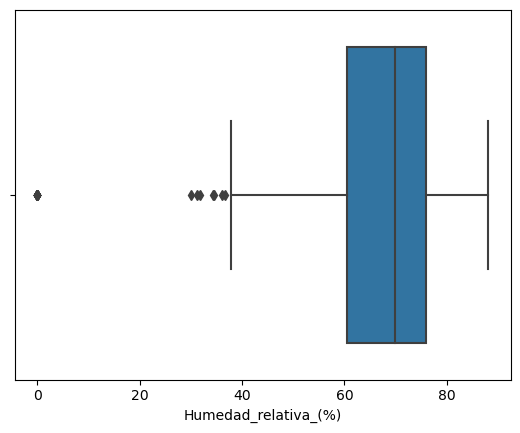

In [93]:
#GRAFICOS BOXPLOt
sns.boxplot(x= df["Humedad_relativa_(%)"])
plt.show()

In [81]:
lower_lim
df["Humedad_relativa_(%)"] = np.where(df["Humedad_relativa_(%)"] <lower_lim, df["Humedad_relativa_(%)"].median(),df['Humedad_relativa_(%)'])

In [56]:
type(result)

pandas.core.frame.DataFrame

In [ ]:
#grouypby
data.sort_values(by='neighbourhood_hosts').groupby('neighbourhood_hosts').agg({'maxPrice': max, 'minPrice':min})
                     maxPrice  minPrice


                  
# **Librerias utiles:**

Pandas

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html#

Numpy

https://numpy.org/


***

# *2) Revisar la idea de Objetos" en python a partir de ejemplos*

Object-based programming languaje

objeto (pd, plt, np, etc) luego del punto se desprenden funcionalidades asociadas a cada objeto

***
***
# *3) manejor de tablas/arrays/vectores*

Comentar comandos: head(), tail(), shape(), info(), loc[], iloc[], describe(),.values, columns,

Comantar comandos de numpy

***

In [14]:
df.tail(10), df.shape

(     X   Y    Per    Por
 54  32  34  77.00   9.77
 55  34  40  88.00  14.03
 56  36   3  73.50  11.29
 57  39   8  75.00  15.32
 58  37  15  69.50  12.92
 59  40  17  57.00   8.86
 60  39  23  58.00   9.32
 61  40  27  81.00  13.72
 62  37  31  80.00  13.11
 63  40  36  15.09    NaN,
 (64, 4))

In [15]:
df.shape

(64, 4)

***
# *4) loops*

for ... in ...:

    itera sobre lo que uno quiera
    
    
Sobre què se puede iterar??

 
 a- lista
 
 b- columnas de una tabla
 
 c- palabras de una oracion
 
 

In [26]:
#        Descomantar a medida que avanzamos con la explicacion
#·--------------------------------------------------------------------
# df.columns   # esto es una lista con nombres

#·--------------------------------------------------------------------
# iteramos sobre la lista:

#for col in df.columns:
#    print(col)

#·--------------------------------------------------------------------
# iteramos sobre las columnas:
#for col in df.columns:
#    print(df[col])
  
#·--------------------------------------------------------------------    
# iteramos sobre las filas:
    
#for rows in df.iloc:
#    print(rows)   

# iteramos sobre oraciones:
    
#oracion= " Mañana va a estar nubleado, por eso no voy a ir a clase"
#oracion[0]
#for palabra in oracion:
#    print(palabra)

X       4.00
Y       3.00
Per    50.50
Por     5.67
Name: 0, dtype: float64
X       3.00
Y      10.00
Per    46.00
Por     7.65
Name: 1, dtype: float64
X       1.00
Y      14.00
Per    26.50
Por     7.11
Name: 2, dtype: float64
X       4.00
Y      17.00
Per    21.00
Por     4.76
Name: 3, dtype: float64
X       2.0
Y      25.0
Per    47.0
Por     9.7
Name: 4, dtype: float64
X       3.00
Y      30.00
Per    48.00
Por     8.41
Name: 5, dtype: float64
X       4.00
Y      35.00
Per    62.00
Por    12.35
Name: 6, dtype: float64
X       3.00
Y      40.00
Per    61.00
Por    10.84
Name: 7, dtype: float64
X       9.00
Y       3.00
Per    34.50
Por     7.04
Name: 8, dtype: float64
X      10.00
Y       7.00
Per    43.50
Por     8.18
Name: 9, dtype: float64
X       9.00
Y      11.00
Per    65.00
Por     9.32
Name: 10, dtype: float64
X       6.00
Y      17.00
Per    27.00
Por     6.13
Name: 11, dtype: float64
X       7.00
Y      24.00
Per    24.00
Por     9.16
Name: 12, dtype: float64
X       9.00


***
# *5) Graficos:*
    
https://matplotlib.org/

***

In [27]:
df.columns

Index(['X', 'Y', 'Per', 'Por'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9ef7dd8490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ef7b839d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9ef7dd8850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9ef7e8ddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ef7e8d160>],
 'means': []}

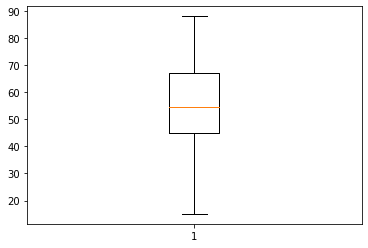

In [28]:
#ejemplo: df.Per  #  df.Per.values

plt.boxplot(df.Per)
#plt.hist()
#plt.scatter()
#plt.bar()


#

***
# *6) guardado de la informacion (tablas, graficos, modelos)*

***

In [38]:
df.to_csv(...)
df.to_excel(...)

# GUardamos figuras *******

plt.savefig('foo.png', bbox_inches='tight')

TypeError: to_excel() missing 1 required positional argument: 'excel_writer'

***

# *7) Armado de una funciòn*


def funcion(...):

    ...
    
    ...
    
    return ...
    
  ***